# Prikazovanje podatkov - osnonvo

Viri:
- [Python Seaborn Tutorial For Beginners](https://www.datacamp.com/community/tutorials/seaborn-python-tutorial)
- [The Ultimate Python Seaborn Tutorial](https://elitedatascience.com/python-seaborn-tutorial)
- [Matplotlib tutorial](https://github.com/rougier/matplotlib-tutorial)

## Representation Of Data



## Introduction To The Data

<div><p>The <a target="_blank" href="https://www.bls.gov">United States Bureau of Labor Statistics</a> (BLS) surveys and calculates the monthly unemployment rate.  The unemployment rate is the percentage of individuals in the labor force without a job.  While unemployment rate <a target="_blank" href="https://en.wikipedia.org/wiki/Unemployment#Limitations_of_the_unemployment_definition">isn't perfect</a>, it's a commonly used proxy for the health of the economy.  You may have heard politicians and reporters state the unemployment rate when commenting on the economy.  You can read more about how the BLS calculates the unemployment rate <a target="_blank" href="http://www.bls.gov/cps/cps_htgm.htm">here</a>.</p>
<p>The BLS releases monthly unemployment data available for download as an Excel file, with the <code>.xlsx</code> file extension.  While the pandas library can read in XLSX files, it relies on an external library for actually parsing the format.  Let's instead download the same dataset as a CSV file from the website of the <a target="_blank" href="https://www.stlouisfed.org/">Federal Reserve Bank of St. Louis</a>.  We've downloaded the monthly unemployment rate as a CSV from January 1948 to August 2016, saved it as <code>unrate.csv</code>, and made it available in this mission.  </p>
<p>To download this dataset on your own, cick the <code>unrate.csv</code> data tab located to the right, and then click the download button.</p>
<p>Before we get into visual representations of data, let's first read this CSV file into pandas to explore the table representation of this data.  The dataset we'll be working with is a <a target="_blank" href="https://en.wikipedia.org/wiki/Time_series">time series</a> dataset, which means the data points (monthly unemployment rates) are ordered by time.  Here's a preview of the dataset:</p>
<p>
</p><table>
<tbody><tr>
<th>DATE</th>
<th>VALUE</th>
</tr>
<tr>
<td>1948-01-01</td>
<td>3.4</td>
</tr>
<tr>
<td>1948-02-01</td>
<td>3.8</td>
</tr>
<tr>
<td>1948-03-01</td>
<td>4.0</td>
</tr>
<tr>
<td>1948-04-01</td>
<td>3.9</td>
</tr>
<tr>
<td>1948-05-01</td>
<td>3.5</td>
</tr>
</tbody></table>
<p></p>
<p>When we read the dataset into a DataFrame, pandas will set the data type of the <code>DATE</code> column as a text column.  Because of how pandas reads in strings internally, this column is given a data type of <code>object</code>.  We need to convert this column to the <code>datetime</code> type using the <a target="_blank" href="http://pandas.pydata.org/pandas-docs/stable/generated/pandas.to_datetime.html">pandas.to_datetime()</a> function, which returns a Series object with the <code>datetime</code> data type that we can assign back to the DataFrame:</p>
</div>

```python
import pandas as pd
df['col'] = pd.to_datetime(df['col'])
```

In [90]:
import pandas as pd

In [91]:
unrate = pd.read_csv('data/unrate.csv')

In [92]:
unrate.head()

,DATE,VALUE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [93]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   DATE    824 non-null    object 
 1   VALUE   824 non-null    float64
dtypes: float64(1), object(1)
memory usage: 13.0+ KB


In [94]:
unrate['DATE'] = pd.to_datetime(unrate['DATE'])

In [95]:
unrate.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 824 entries, 0 to 823
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   DATE    824 non-null    datetime64[ns]
 1   VALUE   824 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 13.0 KB


## Introduction to matplotlib

In [96]:
%matplotlib inline
import matplotlib.pyplot as plt

In [97]:
import matplotlib
print(f'matplotlib: {matplotlib.__version__}')

matplotlib: 3.8.2


Using the different pyplot functions, we can create, customize, and display a plot. For example, we can use 2 functions to :

    plt.plot()
    plt.show()

<div>
<p>Because we didn't pass in any arguments, the <a target="_blank" href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">plot()</a> function would generate an empty plot with just the axes and ticks and the <a target="_blank" href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.show">show()</a> function would display that plot.  You'll notice that we didn't assign the plot to a variable and then call a method on the variable to display it.  We instead called 2 functions on the pyplot module directly.  </p>
<p>This is because every time we call a pyplot function, the module maintains and updates the plot internally (also known as state).  When we call <code>show()</code>, the plot is displayed and the internal state is destroyed.  While this workflow isn't ideal when we're writing functions that create plots on a repeated basis as part of a larger application, it's useful when exploring data.</p>
<p>Let's run this code to see the default properties matplotlib uses.   If you'd like to follow along on your own computer, we recommend installing matplotlib using Anaconda: <code>conda install matplotlib</code>.  We recommend working with matplotlib using Jupyter Notebook because it can render the plots in the notebook itself.  You will need to run the following Jupyter magic in a code cell each time you open your notebook: <code>%matplotlib inline</code>.  Whenever you call <code>show()</code>, the plots will be displayed in the output cell. You can read more <a target="_blank" href="http://ipython.readthedocs.io/en/stable/interactive/plotting.html">here</a>.</p></div>

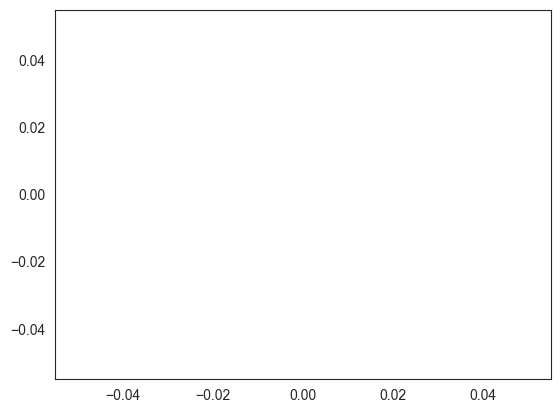

In [98]:
plt.plot()
plt.show()

## Axis Ticks

<div><p>By default, Matplotlib displayed a coordinate grid with:</p>
<ul>
<li>the x-axis and y-axis values ranging from <code>-0.06</code> to <code>0.06</code></li>
<li>no grid lines</li>
<li>no data</li>
</ul>
<p>Even though no data was plotted, the x-axis and y-axis <strong>ticks</strong> correspond to the <code>-0.06</code> to <code>0.06</code> value range.  The axis ticks consist of tick marks and tick labels.  Here's a focused view of the x-axis tick marks and x-axis tick labels:</p>
<p><img alt="Axis Ticks" src="images/axis+ticks.png"></p>
<p>To create a line chart of the unemployment data from 1948, we need:</p>
<ul>
<li>the x-axis to range from <code>01-01-1948</code> to <code>12-01-1948</code> (which corresponds to the first and last months in 1948)</li>
<li>the y-axis to range from <code>3.4</code> to <code>4.0</code> (which correspond to the minimum and maximum unemployment values)</li>
</ul>
<p>Instead of manually updating the ticks, drawing each marker, and connecting the markers with lines, we can just specify the data we want plotted and let matplotlib handle the rest.  To generate the line chart we're interested in, we pass in the list of x-values as the first parameter and the list of y-values as the second parameter to <a target="_blank" href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.plot">plot()</a>:</p>
</div>

In [99]:
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

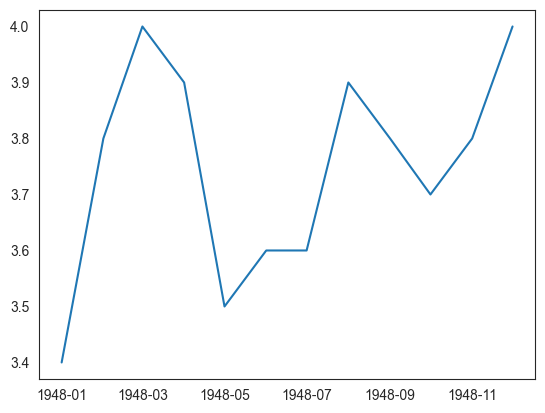

In [100]:
# Assigned first 12 rows to a variable just for easy reference.
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.show()

### Fixing Axis Ticks

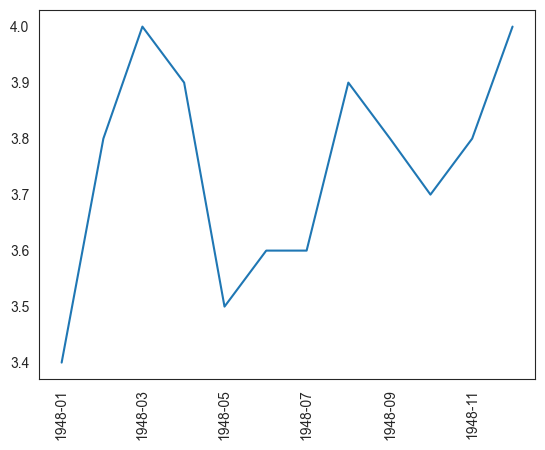

In [101]:
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.show()

### Adding Axis Labels And A Title

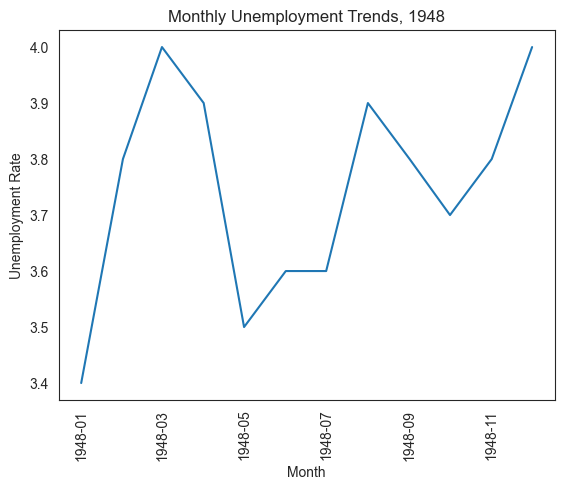

In [102]:
first_twelve = unrate[0:12]
plt.plot(first_twelve['DATE'], first_twelve['VALUE'])
plt.xticks(rotation=90)
plt.xlabel("Month")
plt.ylabel("Unemployment Rate")
plt.title("Monthly Unemployment Trends, 1948")
plt.show()




## Matplotlib Classes

<div><p>When we were working with a single plot, pyplot was storing and updating the state of that single plot.  We could tweak the plot just using the functions in the pyplot module.  When we want to work with multiple plots, however, we need to be more explicit about which plot we're making changes to.  This means we need to understand the matplotlib classes that pyplot uses internally to maintain state so we can interact with them directly.  Let's first start by understanding what pyplot was automatically storing under the hood when we create a single plot:</p>
<ul>
<li>a container for all plots was created (returned as a <a target="_blank" href="http://matplotlib.org/api/figure_api.html#matplotlib.figure.Figure">Figure object</a>)</li>
<li>a container for the plot was positioned on a grid (the plot returned as an <a target="_blank" href="http://matplotlib.org/api/axes_api.html#matplotlib-axes">Axes object</a>)</li>
<li>visual symbols were added to the plot (using the Axes methods)</li>
</ul>
<p>A figure acts as a container for all of our plots and has methods for customizing the appearance and behavior for the plots within that container.  Some examples include changing the overall width and height of the plotting area and the spacing between plots.  </p>
<p>We can manually create a figure by calling <a target="_blank" href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.figure">pyplot.figure()</a>:</p>
</div>

In [103]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

<div>
<p>Instead of only calling the pyplot function, we assigned its return value to a variable (<code>fig</code>).  After a figure is created, an axes for a single plot containing no data is created within the context of the figure.  When rendered without data, the plot will resemble the empty plot from the previous mission.  The Axes object acts as its own container for the various components of the plot, such as:</p>
<ul>
<li>values on the x-axis and y-axis</li>
<li>ticks on the x-axis and y-axis</li>
<li>all visual symbols, such as:<ul>
<li>markers</li>
<li>lines</li>
<li>gridlines</li>
</ul>
</li>
</ul>
<p>While plots are represented using instances of the Axes class, they're also often referred to as subplots in matplotlib.  To add a new subplot to an existing figure, use <a target="_blank" href="https://matplotlib.org/api/_as_gen/matplotlib.figure.Figure.html#matplotlib.figure.Figure.add_subplot">Figure.add_subplot</a>.  This will return a new Axes object, which needs to be assigned to a variable:</p>
</div>

    axes_obj = fig.add_subplot(nrows, ncols, plot_number)

In [104]:
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)

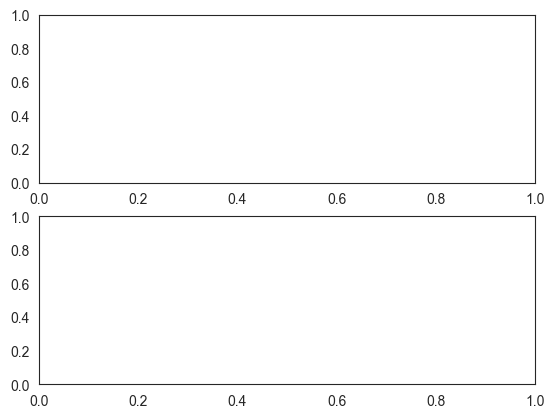

In [105]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
plt.show()

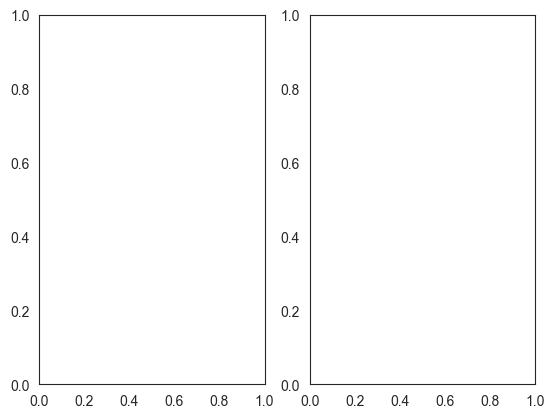

In [106]:
fig = plt.figure()
ax1 = fig.add_subplot(1,2,1)
ax2 = fig.add_subplot(1,2,2)
plt.show()

## Grid Positioning


<p><img alt="Multiple Subplots" src="images/multiple_subplots.png"></p>

<p><img alt="Subplot Grid" src="images/subplot_grid.png"></p>

<p><img alt="Missing One Plot" src="images/multiple_subplots_missing_one_plot.png"></p></div>

## Adding Data

In [107]:
first_twelve = unrate[0:12]
second_twelve = unrate[12:24]

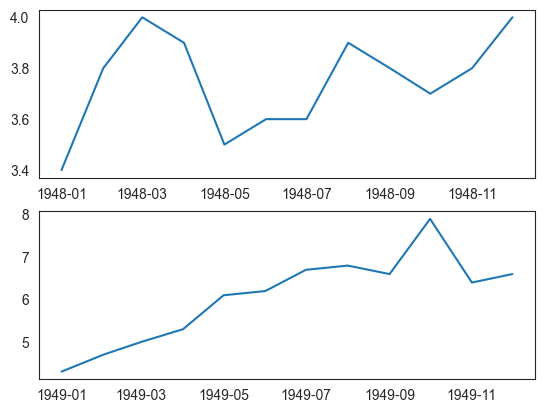

In [108]:
fig = plt.figure()
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(first_twelve['DATE'], first_twelve['VALUE'])
ax2.plot(second_twelve['DATE'], second_twelve['VALUE'])
plt.show()



## Formatting And Spacing

<div><p>One issue with the 2 plots is that the x-axis ticks labels are unreadable.  The other issue is that the plots are squeezed together vertically and hard to interpret.  Even though now we generated 2 line charts, the total plotting area for the figure remained the same:</p>
<p><img alt="Two Plots" src="images/plotting_area_stays_same.png"></p>
<p>This is because matplotlib used the default dimensions for the total plotting area instead of resizing it to accommodate the plots.  If we want to expand the plotting area, we have to specify this ourselves when we create the figure.  To tweak the dimensions of the plotting area, we need to use the <code>figsize</code> parameter when we call <code>plt.figure()</code>:</p>
<p>This parameter takes in a tuple of floats:</p>
</div>

    fig = plt.figure(figsize=(width, height))

<div>
<p>The unit for both width and height values is inches.  The <code>dpi</code> parameter, or dots per inch, and the <code>figsize</code> parameter determine how much space on your display a plot takes up.  By increasing the width and the height of the plotting area, we can address both issues.</p></div>

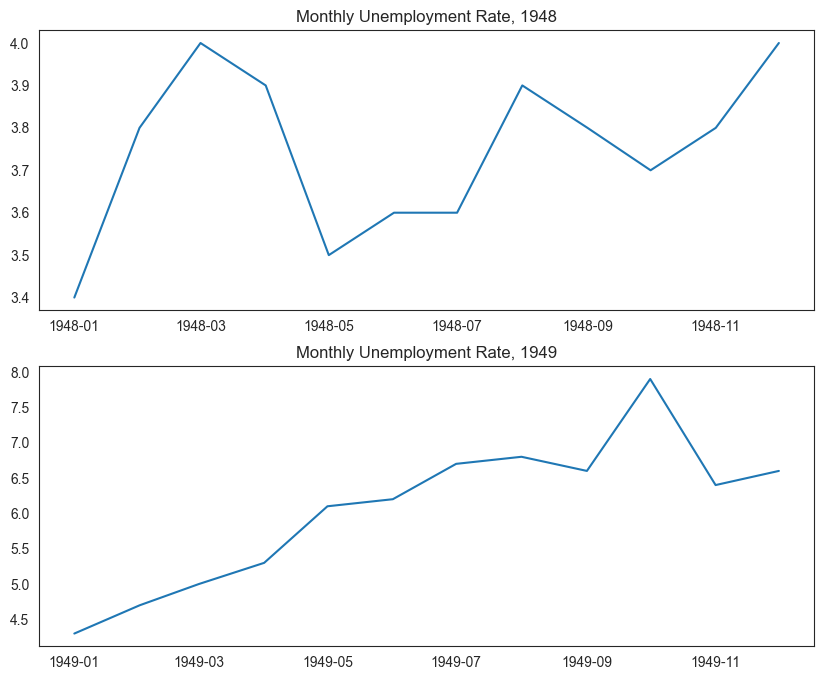

In [109]:
fig = plt.figure(figsize=(10,8))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.plot(unrate[0:12]['DATE'], unrate[0:12]['VALUE'])
ax1.set_title('Monthly Unemployment Rate, 1948')
ax2.plot(unrate[12:24]['DATE'], unrate[12:24]['VALUE'])
ax2.set_title('Monthly Unemployment Rate, 1949')



plt.show()

## Comparing Across More Years

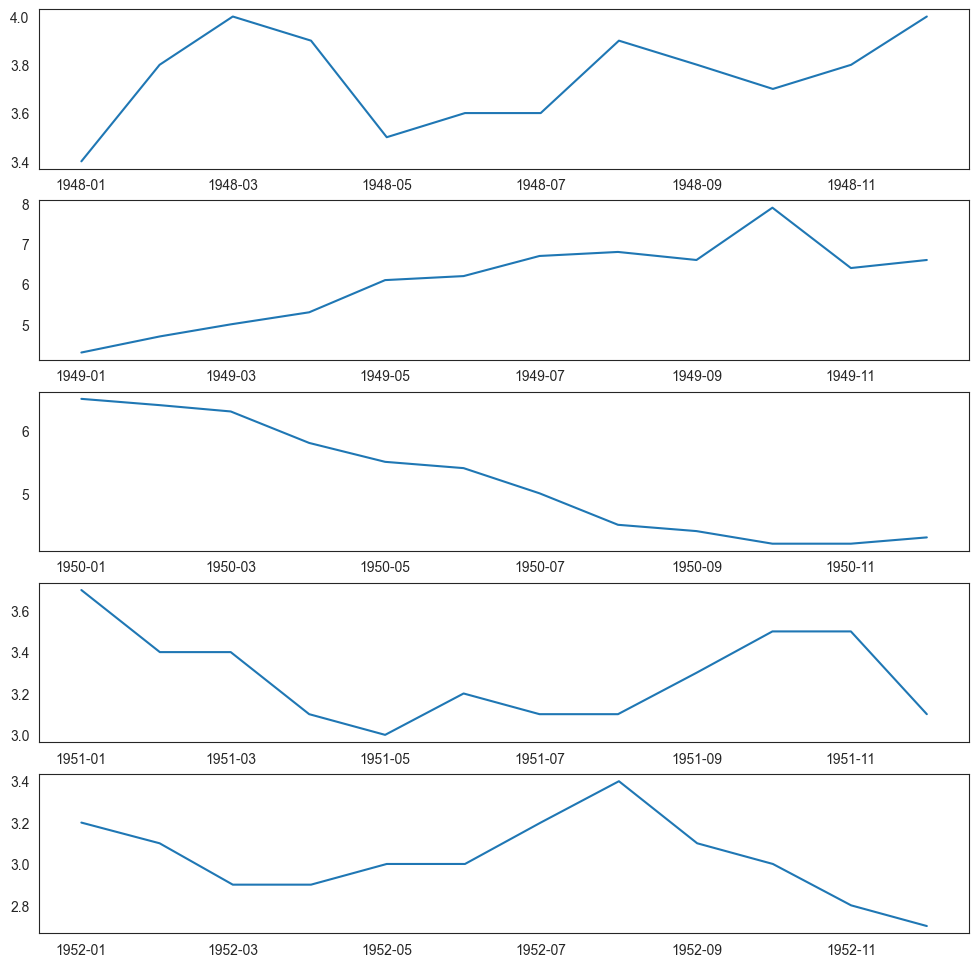

In [110]:
fig = plt.figure(figsize=(12,12))

for i in range(5):
    ax = fig.add_subplot(5,1,i+1)
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    ax.plot(subset['DATE'], subset['VALUE'])

plt.show()

## Overlaying Line Charts

In [111]:
unrate['MONTH'] = unrate['DATE'].dt.month

<div>
<p>Calling <code>pandas.Series.dt.month</code> returns a Series containing the integer values for each month (e.g. <code>1</code> for January, <code>2</code> for February, etc.).  Under the hood, pandas applies the <a target="_blank" href="https://docs.python.org/3/library/datetime.html#datetime.date.month">datetime.date.month</a> attribute from the <a target="_blank" href="https://docs.python.org/3/library/datetime.html#datetime.date">datetime.date class</a> over each datetime value in the <code>DATE</code> column, which returns the integer month value.  Let's now move onto generating multiple line charts in the same subplot.</p>
<p>In the last mission, we called <code>pyplot.plot()</code> to generate a single line chart.  Under the hood, matplotlib created a figure and a single subplot for this line chart.  If we call <code>pyplot.plot()</code> multiple times, matplotlib will generate the line charts on the single subplot.  </p>
</div>

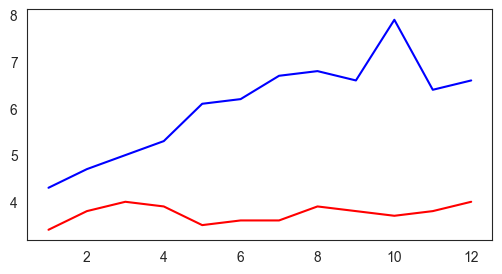

In [112]:
fig = plt.figure(figsize=(6,3))
plt.plot(unrate[0:12]['MONTH'], unrate[0:12]['VALUE'], c='red')
plt.plot(unrate[12:24]['MONTH'], unrate[12:24]['VALUE'], c='blue')
plt.show()

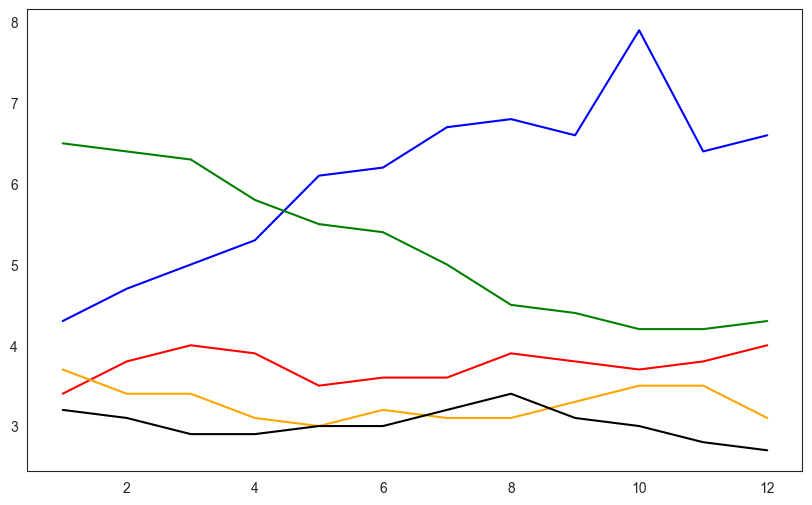

In [113]:
#5 years
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']

for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i])

plt.show()

## Adding A Legend

<div><p>How colorful!  By plotting all of the lines in one coordinate grid, we got a different perspective on the data.  The main thing that sticks out is how the blue and green lines span a larger range of y values (4% to 8% for blue and 4% to 7% for green) while the 3 plots below them mostly range only between 3% and 4%.  You can tell from the last sentence that we don't know which line corresponds to which year, because the x-axis now only reflects the month values.</p>
<p>To help remind us which year each line corresponds to, we can add a <strong>legend</strong> that links each color to the year the line is representing.  Here's what a legend for the lines in the last screen could look like:</p>
<p><img alt="Legend" src="https://s3.amazonaws.com/dq-content/legend.png"></p>
<p>When we generate each line chart, we need to specify the text label we want each color linked to. The <code>pyplot.plot()</code> function contains a <code>label</code> parameter, which we use to set the year value:</p>
</div>

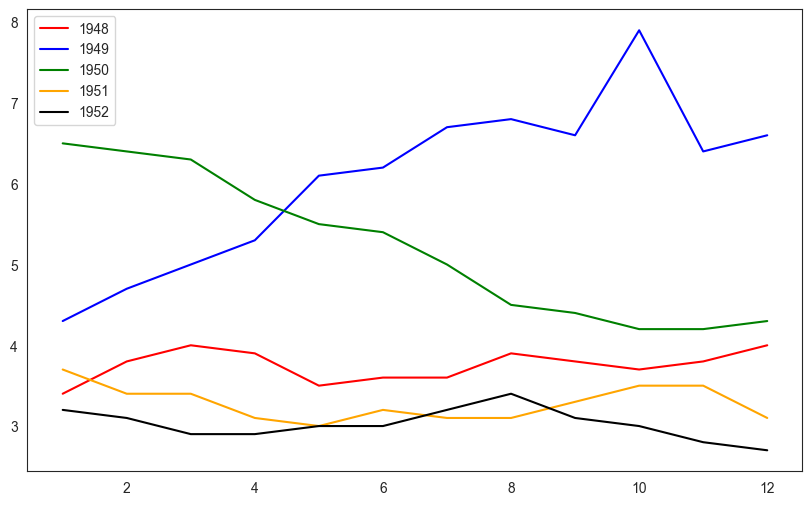

In [114]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

plt.legend(loc='upper left')    
plt.show()

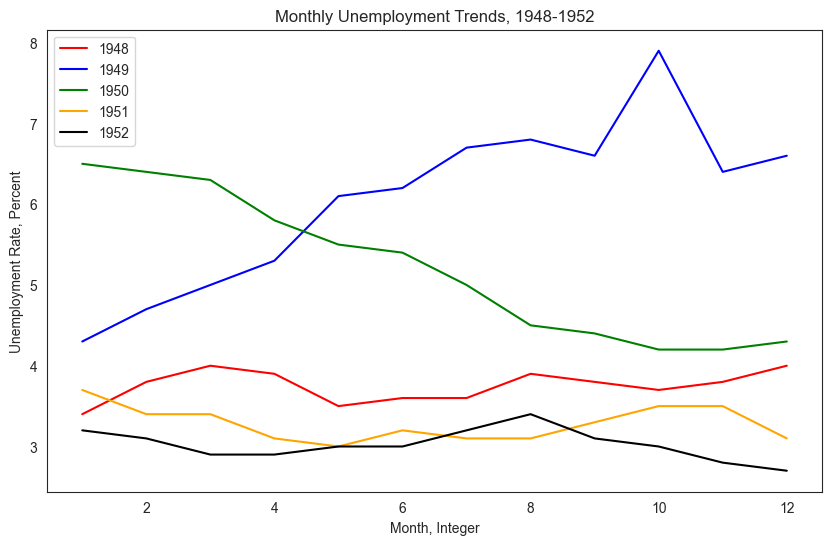

In [115]:
fig = plt.figure(figsize=(10,6))
colors = ['red', 'blue', 'green', 'orange', 'black']
for i in range(5):
    start_index = i*12
    end_index = (i+1)*12
    subset = unrate[start_index:end_index]
    label = str(1948 + i)
    plt.plot(subset['MONTH'], subset['VALUE'], c=colors[i], label=label)

plt.legend(loc='upper left')
plt.title("Monthly Unemployment Trends, 1948-1952")
plt.xlabel("Month, Integer")
plt.ylabel("Unemployment Rate, Percent")
plt.show()

# Other charts in Matplotlib

## Introduction to the data

In [116]:
import pandas as pd

In [117]:
reviews = pd.read_csv('data/fandango_scores.csv')

In [118]:
cols = ['FILM', 'RT_user_norm', 'Metacritic_user_nom', 
        'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

In [119]:
norm_reviews = reviews[cols]

In [120]:
norm_reviews.head(1)

,FILM,RT_user_norm,Metacritic_user_nom,IMDB_norm,Fandango_Ratingvalue,Fandango_Stars
0,Avengers: Age of Ultron (2015),4.3,3.55,3.9,4.5,5.0


## Bar Plots

<div><p>These sites use different scales for ratings.  Some use a 5 star scale while others use a 100 point scale.  In addition, Metacritic and Rotten Tomatoes aggregate scores from both users and film critics, while IMDB and Fandango aggregate only from their users.  We'll focus on just the average scores from users, because not all of the sites have scores from critics.  </p>
<p>The <code>RT_user_norm</code>, <code>Metacritic_user_nom</code>, <code>IMDB_norm</code>, and <code>Fandango_Ratingvalue</code> columns contain the average user rating for each movie, normalized to a 0 to 5 point scale.   This allows us to compare how the users on each site rated a movie.  While using averages isn't perfect because films with a few reviews can skew the average rating, FiveThirtyEight only selected movies with a non-trivial number of ratings to ensure films with only a handful of reviews aren't included.  </p>
<p>If you look at the first row, which lists the average user ratings for <strong>Avengers: Age of Ultron (2015)</strong>, you'll notice that the Fandango ratings, both the actual and the displayed rating, are higher than those from the other sites for a given movie.  While calculating and comparing summary statistics give us hard numbers for quantifying the bias, visualizing the data using plots can help us gain a more intuitive understanding.  We need a visualization that scales graphical objects to the quantitative values we're interested in comparing.  One of these visualizations is a <strong>bar plot</strong>.</p>
<p><img alt="Vertical Bar Plot" src="images/vertical_bar_plot.png"></p>
<p>In the bar plot above, the x-axis represented the different ratings and the y-axis represented the actual ratings.  An effective bar plot uses categorical values on one axis and numerical values on the other axis.  Because bar plots can help us find the category corresponding to the smallest or largest values, it's important that we restrict the number of bars in a single plot.  Using a bar plot to visualize hundreds of values makes it difficult to trace the category with the smallest or largest value.</p>
<p>If the x-axis contains the categorical values and the rectangular bars are scaled vertically, this is known as a vertical bar plot.  A horizontal bar plot flips the axes, which is useful for quickly spotting the largest value.</p>
<p><img alt="Horizontal Bar Plot" src="images/horizontal_bar_plot.png"></p>
<p>An effective bar plot uses a consistent width for each bar.  This helps keep the visual focus on the heights of the bars when comparing.  Let's now learn how to create a vertical bar plot in matplotlib that represents the different user scores for <strong>Avengers: Age of Ultron (2015)</strong>.</p></div>

### Creating Bars

<div><p>When we generated line charts, we passed in the data to <code>pyplot.plot()</code> and matplotlib took care of the rest.  Because the markers and lines in a line chart correspond directly with x-axis and y-axis coordinates, all matplotlib needed was the data we wanted plotted.  To create a useful bar plot, however, we need to specify the positions of the bars, the widths of the bars, and the positions of the axis labels.  Here's a diagram that shows the various values we need to specify:</p>
<p><img alt="Matplotlib Barplot Positioning" src="images/matplotlib_barplot_positioning.png"></p>
<p>We'll focus on positioning the bars on the x-axis in this step and on positioning the x-axis labels in the next step.  We can generate a vertical bar plot using either <a target="_blank" href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.bar">pyplot.bar()</a> or <a target="_blank" href="http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.bar">Axes.bar()</a>.  We'll use <code>Axes.bar()</code> so we can extensively customize the bar plot more easily.  We can use <a target="_blank" href="http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.subplots">pyplot.subplots()</a> to first generate a single subplot and return both the Figure and Axes object.  This is a shortcut from the technique we used in the previous mission:</p>
</div>


<p><img alt="Matplotlib Barplot Positioning" src="images/matplotlib_barplot_positioning.png"></p>


In [121]:
%matplotlib inline
import matplotlib.pyplot as plt
from numpy import arange

In [122]:
# Positions of the left sides of the 5 bars. [0.75, 1.75, 2.75, 3.75, 4.75]
bar_positions = arange(5) + 0.75

In [123]:
# Heights of the bars.  In our case, the average rating for the first movie in the dataset.
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

In [124]:
bar_heights = norm_reviews[num_cols].iloc[0].values

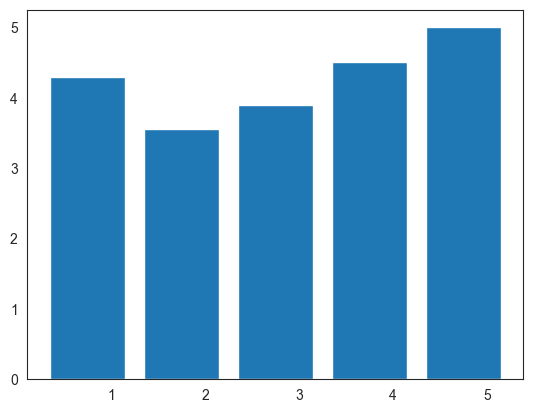

In [125]:
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights)
plt.show()

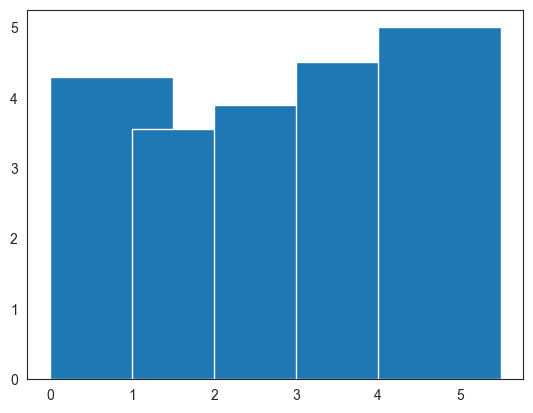

In [126]:
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 1.5)
plt.show()

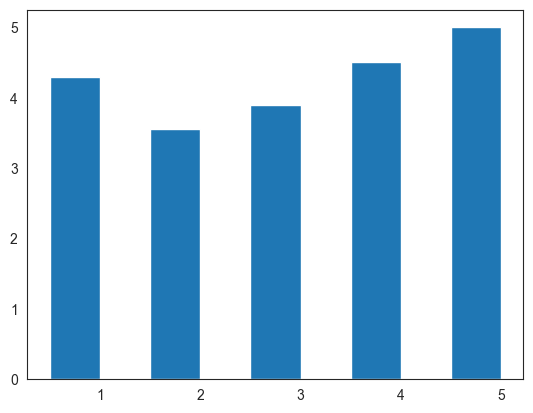

In [127]:
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5)
plt.show()

### Aligning Axis Ticks And Labels

In [128]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']
bar_heights = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)




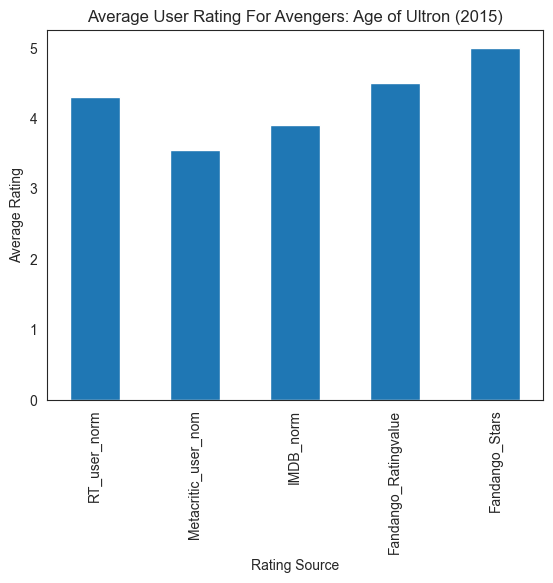

In [129]:
fig, ax = plt.subplots()
ax.bar(bar_positions, bar_heights, 0.5, align='edge')
ax.set_xticks(tick_positions)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_xlabel('Rating Source')
ax.set_ylabel('Average Rating')
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

### Horizontal Bar Plot

<div><p>We can create a horizontal bar plot in matplotlib in a similar fashion.  Instead of using <code>Axes.bar()</code>, we use <a target="_blank" href="http://matplotlib.org/api/axes_api.html#matplotlib.axes.Axes.barh">Axes.barh()</a>.  This method has 2 required parameters, <code>bottom</code> and <code>width</code>.  We use the <code>bottom</code> parameter to specify the y coordinate for the bottom sides for the bars and the <code>width</code> parameter to specify the lengths of the bars:</p>
</div>

    bar_widths = norm_reviews[num_cols].iloc[0].values
    bar_positions = arange(5) + 0.75
    ax.barh(bar_positions, bar_widths, 0.5)

In [130]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue', 'Fandango_Stars']

bar_widths = norm_reviews[num_cols].iloc[0].values
bar_positions = arange(5) + 0.75
tick_positions = range(1,6)

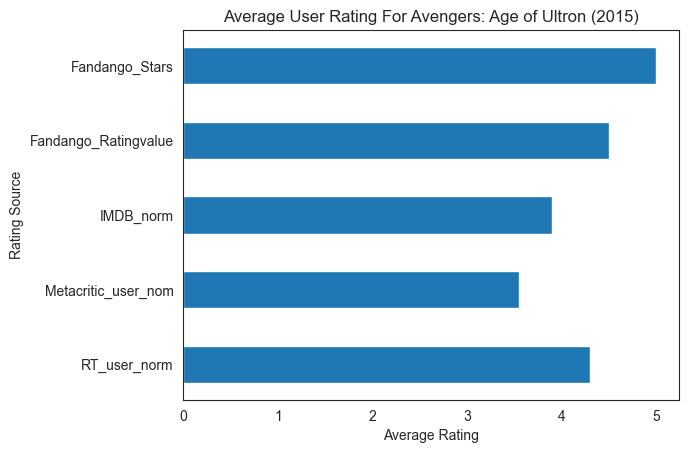

In [131]:
fig, ax = plt.subplots()
ax.barh(bar_positions, bar_widths, 0.5, align='edge')
ax.set_yticks(tick_positions)
ax.set_yticklabels(num_cols)
ax.set_ylabel("Rating Source")
ax.set_xlabel("Average Rating")
ax.set_title('Average User Rating For Avengers: Age of Ultron (2015)')
plt.show()

## Scatter plot

<div><p>From the horizontal bar plot, we can more easily determine that the 2 average scores from Fandango users are higher than those from the other sites.  While bar plots help us visualize a few data points to quickly compare them, they aren't good at helping us visualize many data points.  Let's look at a plot that can help us visualize many points. </p>
<p>In the previous mission, the line charts we generated always connected points from left to right.  This helped us show the trend, up or down, between each point as we scanned visually from left to right.  Instead, we can avoid using lines to connect markers and just use the underlying markers.  A plot containing just the markers is known as a <strong>scatter plot</strong>.</p>
<p><img alt="Imgur" src="images/scatter_plot_intro.png"></p>
<p>A scatter plot helps us determine if 2 columns are weakly or strongly correlated.  While calculating the <a target="_blank" href="https://en.wikipedia.org/wiki/Correlation_coefficient">correlation coefficient</a> will give us a precise number, a scatter plot helps us find outliers, gain a more intuitive sense of how spread out the data is, and compare more easily.</p>
<p>To generate a scatter plot, we use <a target="_blank" href="https://matplotlib.org/api/_as_gen/matplotlib.axes.Axes.scatter.html#matplotlib.axes.Axes.scatter">Axes.scatter()</a>.  The <code>scatter()</code> method has 2 required parameters, <code>x</code> and <code>y</code>, which matches the parameters of the <code>plot()</code> method.  The values for these parameters need to be iterable objects of matching lengths (lists, NumPy arrays, or pandas series).</p>
<p>Let's start by creating a scatter plot that visualizes the relationship between the <code>Fandango_Ratingvalue</code> and <code>RT_user_norm</code> columns.  We're looking for at least a weak correlation between the columns.</p></div>

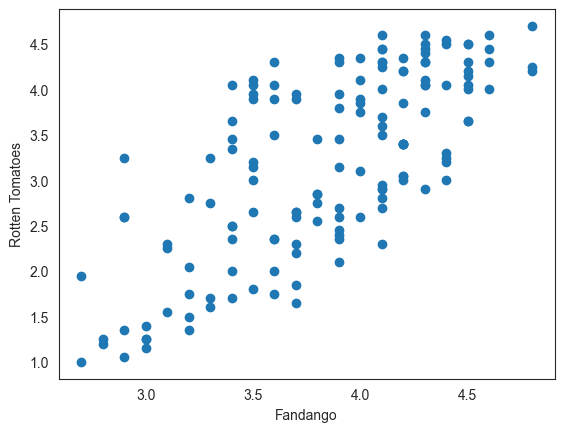

In [132]:
fig, ax = plt.subplots()
ax.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax.set_xlabel("Fandango")
ax.set_ylabel("Rotten Tomatoes")
plt.show()

### Switching axes

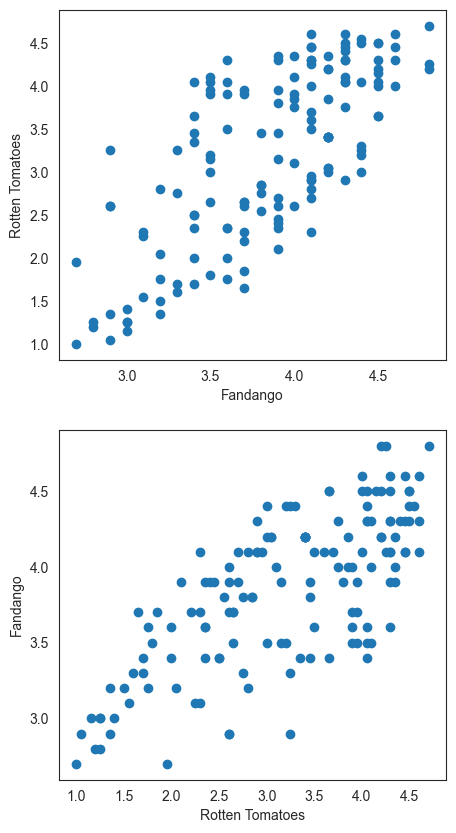

In [133]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(2,1,1)
ax2 = fig.add_subplot(2,1,2)
ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax2.scatter(norm_reviews['RT_user_norm'], norm_reviews['Fandango_Ratingvalue'], )
ax2.set_xlabel("Rotten Tomatoes")
ax2.set_ylabel("Fandango")
plt.show()

### Benchmarking correlation

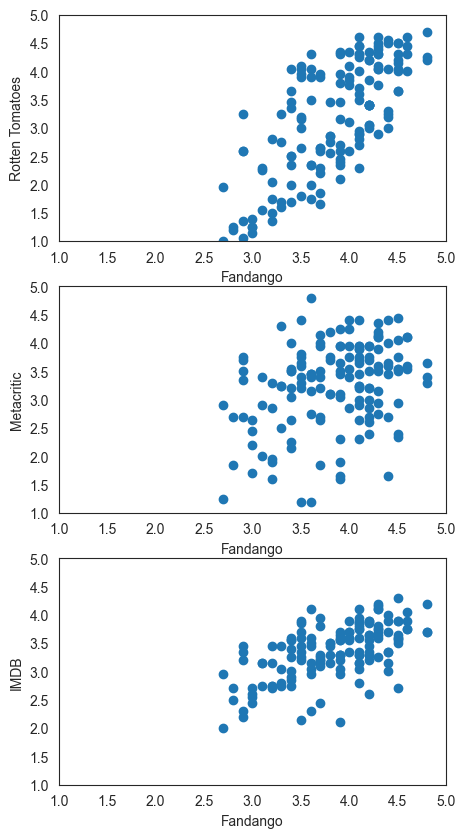

In [134]:
fig = plt.figure(figsize=(5,10))
ax1 = fig.add_subplot(3,1,1)
ax2 = fig.add_subplot(3,1,2)
ax3 = fig.add_subplot(3,1,3)

ax1.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['RT_user_norm'])
ax1.set_xlabel("Fandango")
ax1.set_ylabel("Rotten Tomatoes")
ax1.set_xlim(1, 5)
ax1.set_ylim(1, 5)

ax2.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['Metacritic_user_nom'])
ax2.set_xlabel("Fandango")
ax2.set_ylabel("Metacritic")
ax2.set_xlim(1, 5)
ax2.set_ylim(1, 5)

ax3.scatter(norm_reviews['Fandango_Ratingvalue'], norm_reviews['IMDB_norm'])
ax3.set_xlabel("Fandango")
ax3.set_ylabel("IMDB")
ax3.set_xlim(1, 5)
ax3.set_ylim(1, 5)

plt.show()

## Histogram

### Frequency Distribution

In [135]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()

In [136]:
freq_counts.head()

4.1    16
3.9    12
4.2    12
4.3    11
4.5     9
Name: Fandango_Ratingvalue, dtype: int64

In [137]:
freq_counts = norm_reviews['Fandango_Ratingvalue'].value_counts()
sorted_freq_counts = freq_counts.sort_index()

In [138]:
sorted_freq_counts

2.7     2
2.8     2
2.9     5
3.0     4
3.1     3
3.2     5
3.3     4
3.4     9
3.5     9
3.6     8
3.7     9
3.8     5
3.9    12
4.0     7
4.1    16
4.2    12
4.3    11
4.4     7
4.5     9
4.6     4
4.8     3
Name: Fandango_Ratingvalue, dtype: int64

In [139]:
fandango_distribution = norm_reviews['Fandango_Ratingvalue'].value_counts().sort_index()

In [140]:
imdb_distribution = norm_reviews['IMDB_norm'].value_counts().sort_index()

### Binning


<p><img alt="Binning Introduction" src="images/histogram_binning.png"></p>


### Histogram In Matplotlib

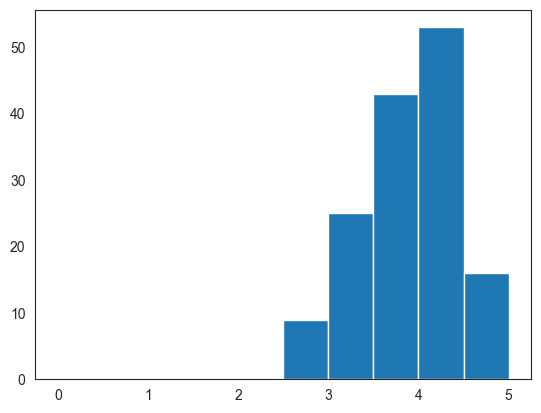

In [141]:
fig, ax = plt.subplots()
ax.hist(norm_reviews['Fandango_Ratingvalue'], range=(0,5))
plt.show()

### Comparing histograms

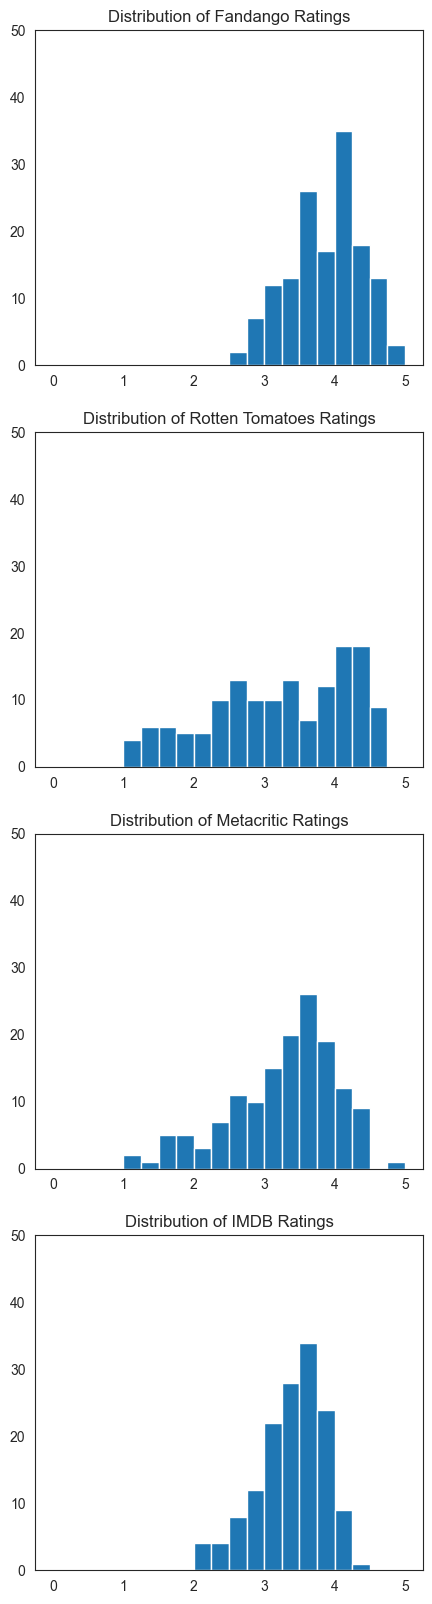

In [142]:
fig = plt.figure(figsize=(5,20))
ax1 = fig.add_subplot(4,1,1)
ax2 = fig.add_subplot(4,1,2)
ax3 = fig.add_subplot(4,1,3)
ax4 = fig.add_subplot(4,1,4)

ax1.hist(norm_reviews['Fandango_Ratingvalue'], bins=20, range=(0,5))
ax1.set_title('Distribution of Fandango Ratings')
ax1.set_ylim(0,50)

ax2.hist(norm_reviews['RT_user_norm'], bins=20, range=(0,5))
ax2.set_title('Distribution of Rotten Tomatoes Ratings')
ax2.set_ylim(0,50)

ax3.hist(norm_reviews['Metacritic_user_nom'], bins=20, range=(0,5))
ax3.set_title('Distribution of Metacritic Ratings')
ax3.set_ylim(0,50)

ax4.hist(norm_reviews['IMDB_norm'], bins=20, range=(0,5))
ax4.set_title('Distribution of IMDB Ratings')
ax4.set_ylim(0,50)

plt.show()

### Quartiles

## Box Plot

<div><p>From the histograms, we can make the following observations:</p>
<ul>
<li>Around 50% of user ratings from Fandango fall in the 2 to 4 score range</li>
<li>Around 50% of user ratings from Rotten Tomatoes fall in the 2 to 4 score range</li>
<li>Around 75% of the user ratings from Metacritic fall in the 2 to 4 score range</li>
<li>Around 90% of the user ratings from IMDB fall in the 2 to 4 score range</li>
</ul>
<p>While histograms allow us to visually estimate the percentage of ratings that fall into a range of bins, they don't allow us to easily understand how the top 25% or the bottom 25% of the ratings differ across the sites.  The bottom 25% of values and top 25% of values both represent <a target="_blank" href="https://en.wikipedia.org/wiki/Quartile">quartiles</a>.  The four quartiles divide the range of values into four regions where each region contains 1/4th of the total values.  </p>
<p>While these regions may sound similar to bins, they differ in how values are grouped into each region.  Each bin covers an equal proportion of the values in the range.  On the other hand, each quartile covers an equal number of values (1/4th of the total values).  To visualize quartiles, we need to use a <strong>box plot</strong>, also referred to as a <a target="_blank" href="https://en.wikipedia.org/wiki/Box_plot">box-and-whisker plot</a>.</p></div>


<p><img alt="Boxplot" src="images/boxplot_intro.png"></p>


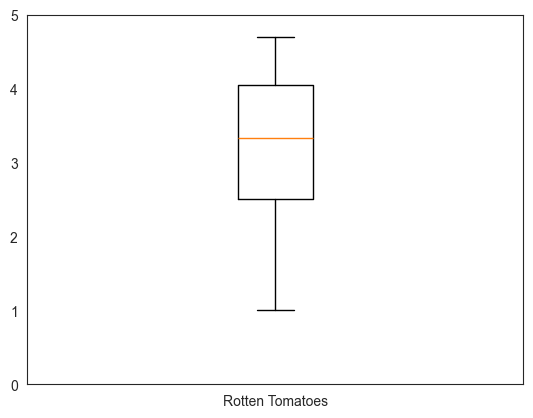

In [143]:
fig, ax = plt.subplots()
ax.boxplot(norm_reviews['RT_user_norm'])
ax.set_xticklabels(['Rotten Tomatoes'])
ax.set_ylim(0,5)
plt.show()

### Multiple Box Plots

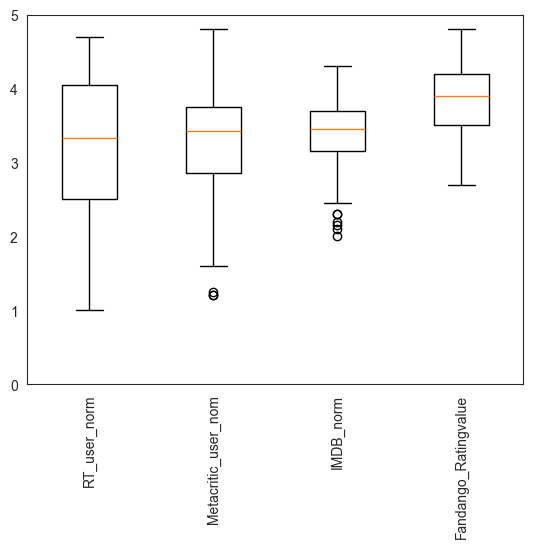

In [144]:
num_cols = ['RT_user_norm', 'Metacritic_user_nom', 'IMDB_norm', 'Fandango_Ratingvalue']
fig, ax = plt.subplots()
ax.boxplot(norm_reviews[num_cols].values)
ax.set_xticklabels(num_cols, rotation=90)
ax.set_ylim(0,5)
plt.show()

# Prikazovanje podatkov - napredno

## Seaborn

### Introduction to the Data Set

<div><p>We'll be working with a data set of the passengers of the Titanic.  The <a target="_blank" href="https://en.wikipedia.org/wiki/Sinking_of_the_RMS_Titanic">Titanic shipwreck</a> is the most famous shipwreck in history and led to the creation of better safety regulations for ships.  One substantial safety issue was that there were not enough lifeboats for every passenger on board, which meant that some passengers were prioritized over others to use the lifeboats.</p>
<p>The data set was compiled by Kaggle for their introductory data science competition, called <strong>Titanic: Machine Learning from Disaster</strong>.  The goal of the competition is to build machine learning models that can 
predict if a passenger survives from their attributes.  You can download the data set by navigating to the <a target="_blank" href="https://www.kaggle.com/c/titanic/data">data download page</a> for the competition and creating a free account.</p>
<p>The data for the passengers is contained in two files:</p>
<ul>
<li><code>train.csv</code>: Contains data on 712 passengers</li>
<li><code>test.csv</code>: Contains data on 418 passengers</li>
</ul>
<p>Each row in both data sets represents a passenger on the Titanic, and some information about them.  We'll be working with the <code>train.csv</code> file, because the <code>Survived</code> column, which describes if a given passenger survived the crash, is preserved in the file.  The column was removed in <code>test.csv</code>, to encourage competitors to practice making predictions using the data.  Here are descriptions for each of the columns in <code>train.csv</code>:</p>
<ul>
<li><code>PassengerId</code> -- A numerical id assigned to each passenger.  </li>
<li><code>Survived</code> -- Whether the passenger survived (<code>1</code>), or didn't (<code>0</code>).</li>
<li><code>Pclass</code> -- The class the passenger was in.</li>
<li><code>Name</code> -- the name of the passenger.</li>
<li><code>Sex</code> --  The gender of the passenger -- male or female.</li>
<li><code>Age</code> -- The age of the passenger.  Fractional.</li>
<li><code>SibSp</code> -- The number of siblings and spouses the passenger had on board.</li>
<li><code>Parch</code> -- The number of parents and children the passenger had on board.</li>
<li><code>Ticket</code> -- The ticket number of the passenger.</li>
<li><code>Fare</code> -- How much the passenger paid for the ticket.</li>
<li><code>Cabin</code> -- Which cabin the passenger was in.</li>
<li><code>Embarked</code> -- Where the passenger boarded the Titanic.</li>
</ul>
<p>Here's what the first few rows look like:</p>


In [145]:
import pandas as pd
titanic = pd.read_csv('data/train.csv')
cols = ['Survived', 'Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
titanic = titanic[cols].dropna()

In [146]:
titanic.shape

(712, 8)

In [147]:
titanic.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


### Creating Histograms In Seaborn

In [148]:
import seaborn as sns    # seaborn is commonly imported as `sns`
import matplotlib.pyplot as plt

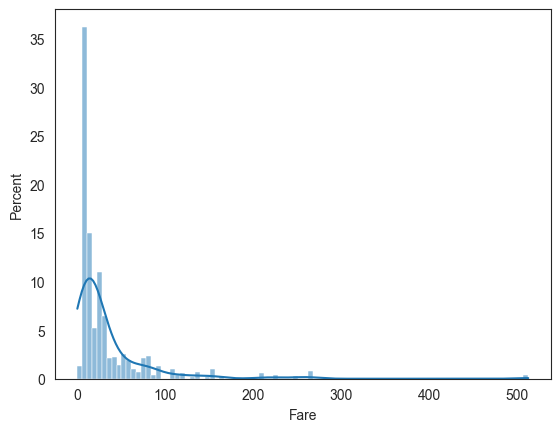

In [149]:
sns.histplot(titanic["Fare"], kde=True, stat="percent")
plt.show()

<p>Under the hood, seaborn creates a histogram using matplotlib, scales the axes values, and styles it.  In addition, seaborn uses a technique called kernel density estimation, or KDE for short, to create a smoothed line chart over the histogram.  If you're interested in learning about how KDE works, you can read more on <a target="_blank" href="https://en.wikipedia.org/wiki/Kernel_density_estimation">Wikipedia</a>.  </p>

<p>What you need to know for now is that the resulting line is a smoother version of the histogram, called a <strong>kernel density plot</strong>.  Kernel density plots are especially helpful when we're comparing distributions, which we'll explore later in this mission.  When viewing a histogram, our visual processing systems influence us to smooth out the bars into a continuous line.</p>

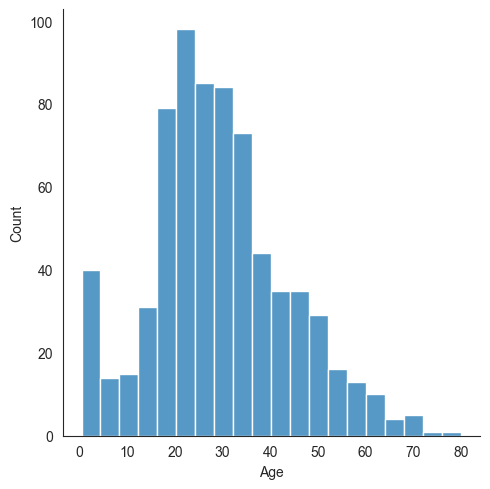

In [150]:
sns.displot(titanic['Age'])
plt.show()

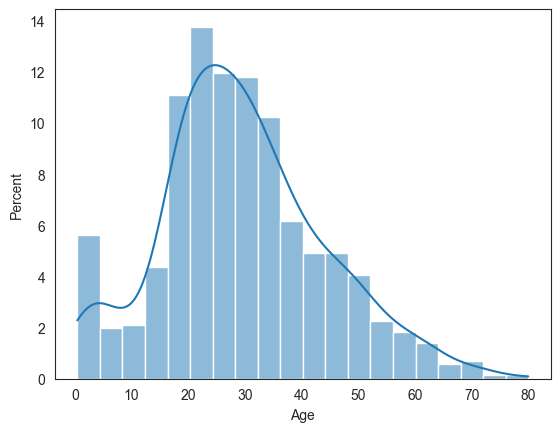

In [151]:
sns.histplot(titanic["Age"], kde=True, stat="percent")
plt.show()

### Generating A Kernel Density Plot

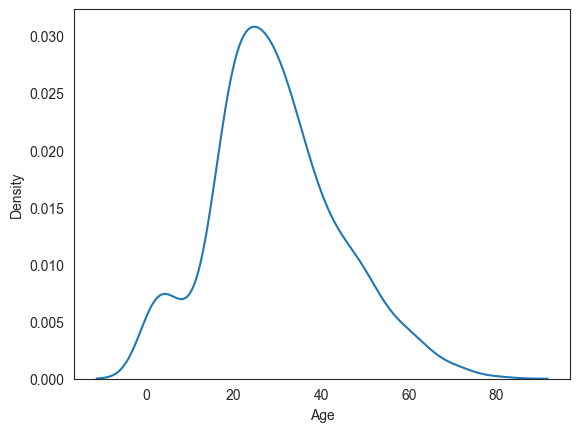

In [152]:
sns.kdeplot(titanic["Age"])
plt.show()

C:\Users\nkast\AppData\Local\Temp\ipykernel_6276\131599773.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic['Age'], shade=True)


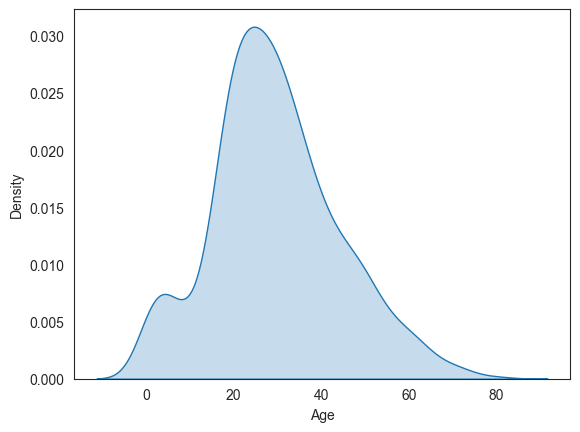

In [153]:
sns.kdeplot(titanic['Age'], shade=True)
plt.xlabel('Age')
plt.show()

### Modifying The Appearance Of The Plots

<div><p>From the plots in the previous step, you'll notice that seaborn:</p>
<ul>
<li>Sets the x-axis label based on the column name passed through <code>plt.xlabel()</code> function</li>
<li>Sets the background color to a light gray color</li>
<li>Hides the x-axis and y-axis ticks</li>
<li>Displays the coordinate grid</li>
</ul>
<p>In the last few missions, we explored some general aesthetics guidelines for plots.  The default seaborn style sheet gets some things right, like hiding axis ticks, and some things wrong, like displaying the coordinate grid and keeping all of the axis spines.  We can use the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.set_style.html#seaborn.set_style"><code>seaborn.set_style()</code></a> function to change the default seaborn style sheet.  Seaborn comes with a few style sheets:</p>
<ul>
<li><code>darkgrid</code>: Coordinate grid displayed, dark background color</li>
<li><code>whitegrid</code>: Coordinate grid displayed, white background color</li>
<li><code>dark</code>: Coordinate grid hidden, dark background color</li>
<li><code>white</code>: Coordinate grid hidden, white background color</li>
<li><code>ticks</code>: Coordinate grid hidden, white background color, ticks visible</li>
</ul>
<p>Here's a diagram that compares the same plot across all styles:</p>
<p><img alt="Seaborn All Styles" src="images/seaborn_all_styles.png"></p>
<p>By default, the seaborn style is set to <code>"darkgrid"</code>:</p>
</div>

<div>
<p>If we change the style sheet using this method, all future plots will match that style in your current session.  This means you need to set the style before generating the plot. </p>
<p>To remove the axis spines for the top and right axes, we use the <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.despine.html#seaborn.despine"><code>seaborn.despine()</code></a> function:</p>
</div>

C:\Users\nkast\AppData\Local\Temp\ipykernel_6276\2267333690.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(titanic['Age'], shade=True)


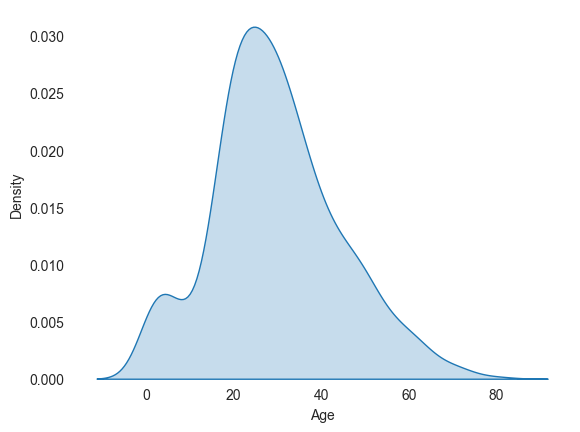

In [154]:
sns.set_style('white')
sns.kdeplot(titanic['Age'], shade=True)
sns.despine(left=True, bottom=True)
plt.xlabel('Age')
plt.show()

### Conditional Plots

<div><p>In the last few missions, we created a <a target="_blank" href="https://en.wikipedia.org/wiki/Small_multiple">small multiple</a>, which is a group of plots that have the same axis scales so the viewer can compare plots effectively.  We accomplished this by subsetting the data manually and generating a plot using matplotlib for each one.</p>
<p>In seaborn, we can create a small multiple by specifying the conditioning criteria and the type of data visualization we want.  For example, we can visualize the differences in age distributions between passengers who survived and those who didn't by creating a pair of kernel density plots.  One kernel density plot would visualize the distribution of values in the <code>"Age"</code> column where <code>Survived</code> equalled <code>0</code> and the other would visualize the distribution of values in the <code>"Age"</code> column where <code>Survived</code> equalled <code>1</code>.</p>
<p>Here's what those plots look like:</p>
<p><img alt="Simple Conditional KDE Plot" src="images/seaborn_simple_conditional.png"></p>
<p>The code to generate the pair of plots, is short and sweet:</p>
</div>

c:\Users\nkast\anaconda3\envs\parser\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\nkast\anaconda3\envs\parser\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


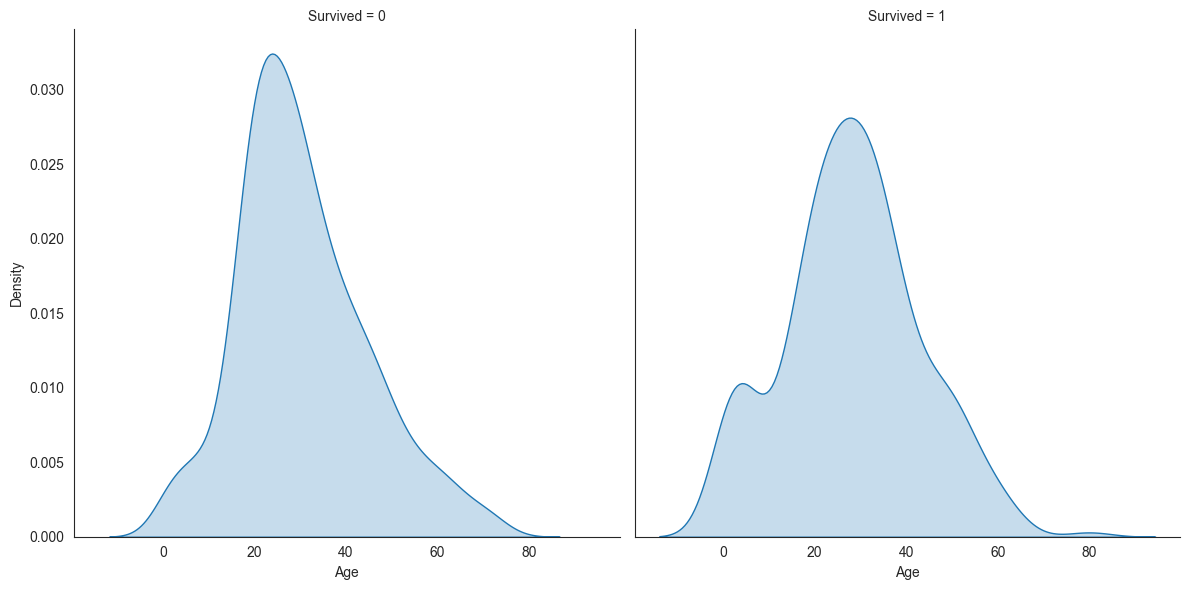

In [155]:
# Condition on unique values of the "Survived" column.
g = sns.FacetGrid(titanic, col="Survived", height=6)
# For each subset of values, generate a kernel density plot of the "Age" columns.
g.map(sns.kdeplot, "Age", shade=True)
plt.show()

<div>
<p>Seaborn handled:</p>
<ul>
<li>subsetting the data into rows where <code>Survived</code> is <code>0</code> and where <code>Survived</code> is <code>1</code></li>
<li>creating both Axes objects, ensuring the same axis scales</li>
<li>plotting both kernel density plots</li>
</ul>
<p>Instead of subsetting the data and generating each plot ourselves, seaborn allows us to express the plots we want as parameter values.  The <a target="_blank" href="http://seaborn.pydata.org/generated/seaborn.FacetGrid.html#seaborn.FacetGrid"><code>seaborn.FacetGrid</code></a> object is used to represent the layout of the plots in the grid and the columns used for subsetting the data.  The word "facet" from <code>FacetGrid</code> is another word for "subset".  Setting the <code>col</code> parameter to <code>"Survived"</code> specifies a separate plot for each unique value in the <code>Survived</code> column.  Setting the <code>hight</code> parameter to <code>6</code> specifies a height of 6 inches for each plot.</p>
<p>Once we've created the grid, we use the <code>FacetGrid.map()</code> method to specify the plot we want for each unique value of <code>Survived</code>.  Seaborn generated one kernel density plot for the ages of passengers that survived and one kernel density plot for the ages of passengers that didn't survive.</p>
<p>The function that's passed into <code>FacetGrid.map()</code> has to be a valid matplotlib or seaborn function.  For example, we can map matplotlib histograms to the grid:</p>
</div>

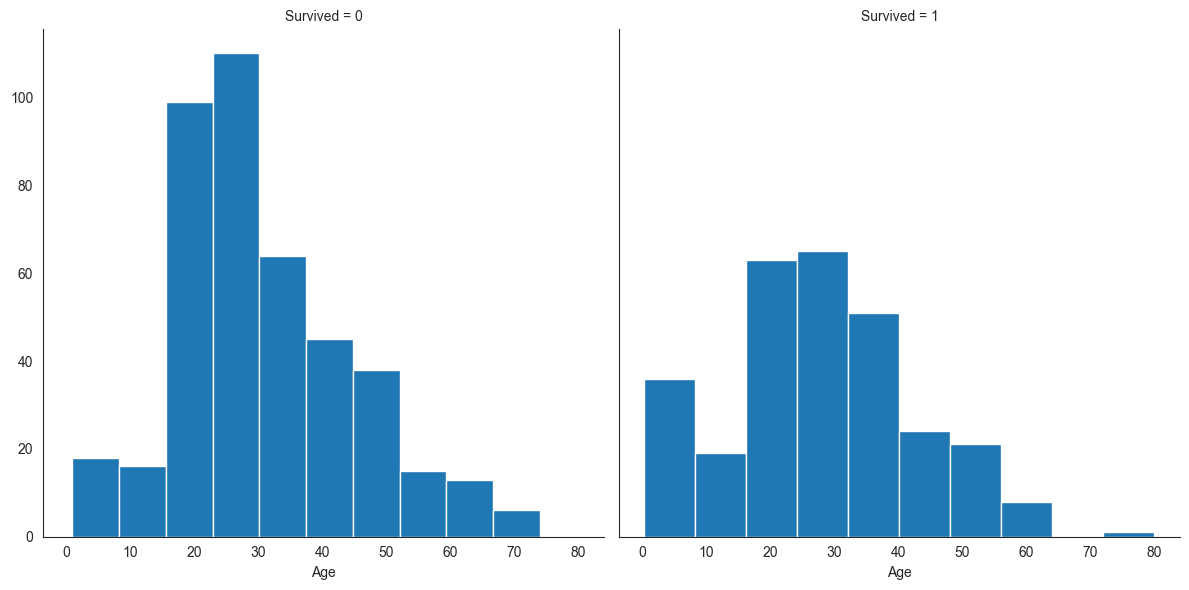

In [156]:
g = sns.FacetGrid(titanic, col="Survived", height=6)
g.map(plt.hist, "Age")
plt.show()

c:\Users\nkast\anaconda3\envs\parser\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\nkast\anaconda3\envs\parser\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)
c:\Users\nkast\anaconda3\envs\parser\lib\site-packages\seaborn\axisgrid.py:854: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  func(*plot_args, **plot_kwargs)


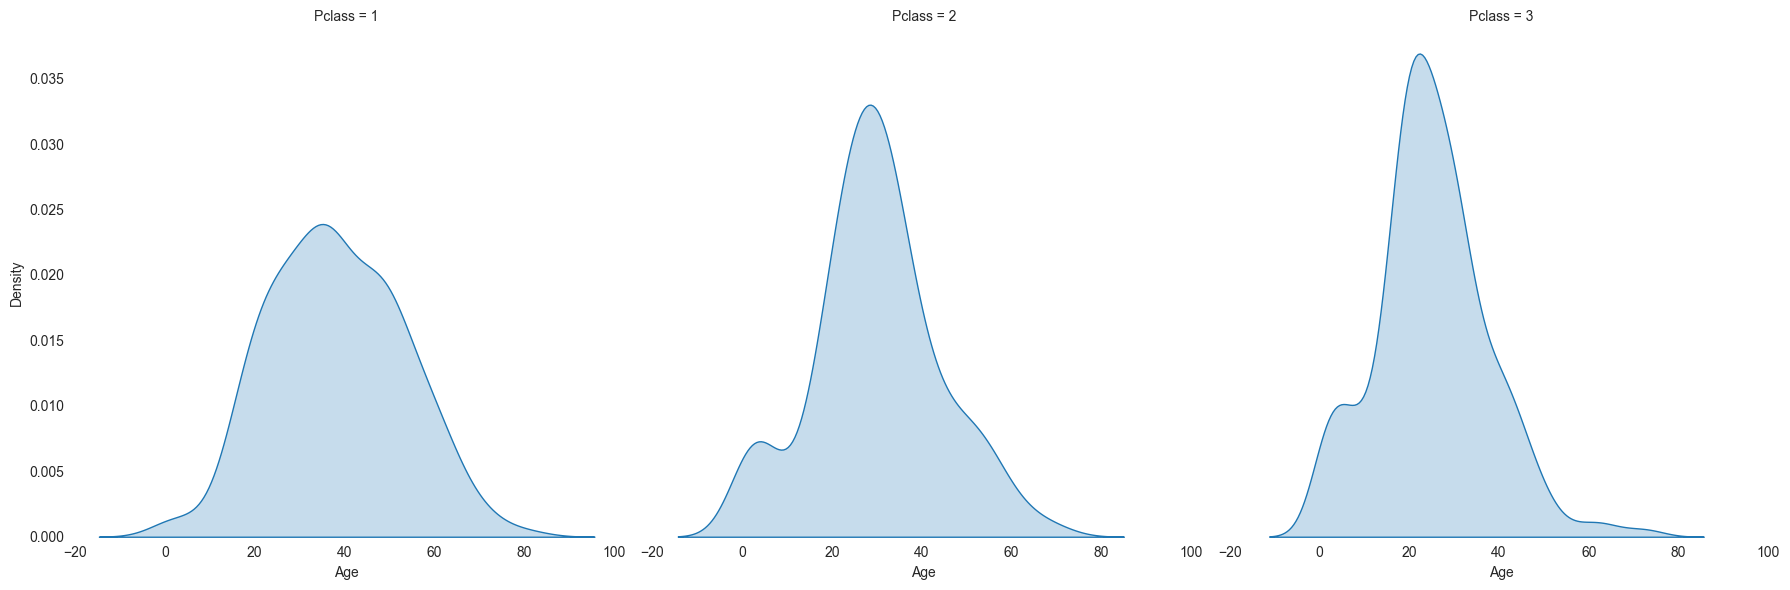

In [157]:
g = sns.FacetGrid(titanic, col='Pclass', height=6)
g.map(sns.kdeplot, 'Age', shade=True)
sns.despine(left=True, bottom=True)
plt.show()

<div><p>We can use two conditions to generate a grid of plots, each containing a subset of the data with a unique combination of each condition.  When creating a <code>FacetGrid</code>, we use the <code>row</code> parameter to specify the column in the dataframe we want used to subset across the rows in the grid.  The best way to understand this is to see a working example.</p>
<p>The starter code subsets the dataframe on different combinations of unique values in both the <code>Pclass</code> and <code>Survived</code> columns.  Try changing the conditions to see the resulting plots.</p></div>

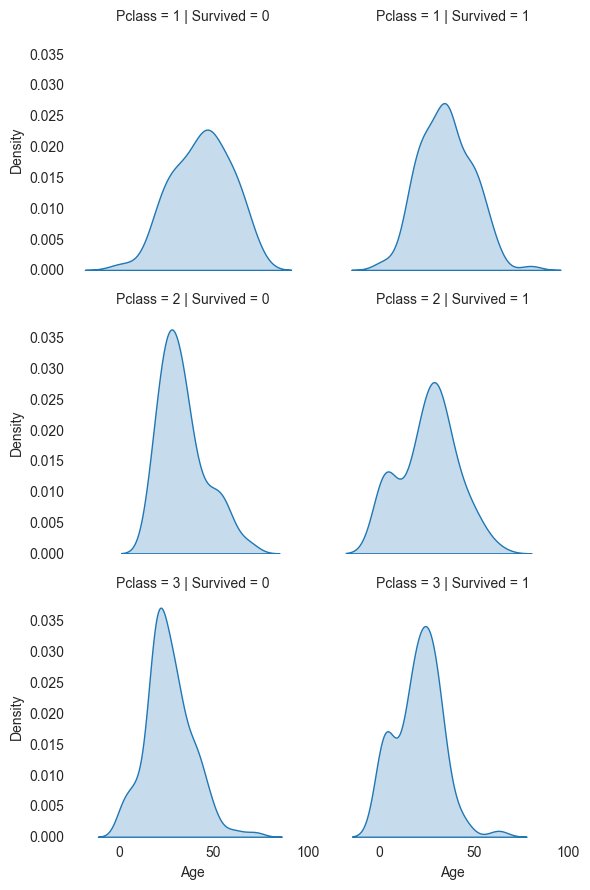

In [158]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass")
g.map(sns.kdeplot, "Age", fill=True) #fill instead of shape
sns.despine(left=True, bottom=True)
plt.show()

<div><p>When subsetting data using two conditions, the rows in the grid represented one condition while the columns represented another.  We can express a third condition by generating multiple plots on the same subplot in the grid and color them differently.  Thankfully, we can add a condition just by setting the <code>hue</code> parameter to the column name from the dataframe.</p>
<p>Let's add a new condition to the grid of plots we generated in the last step and see what this grid of plots would look like.</p></div>

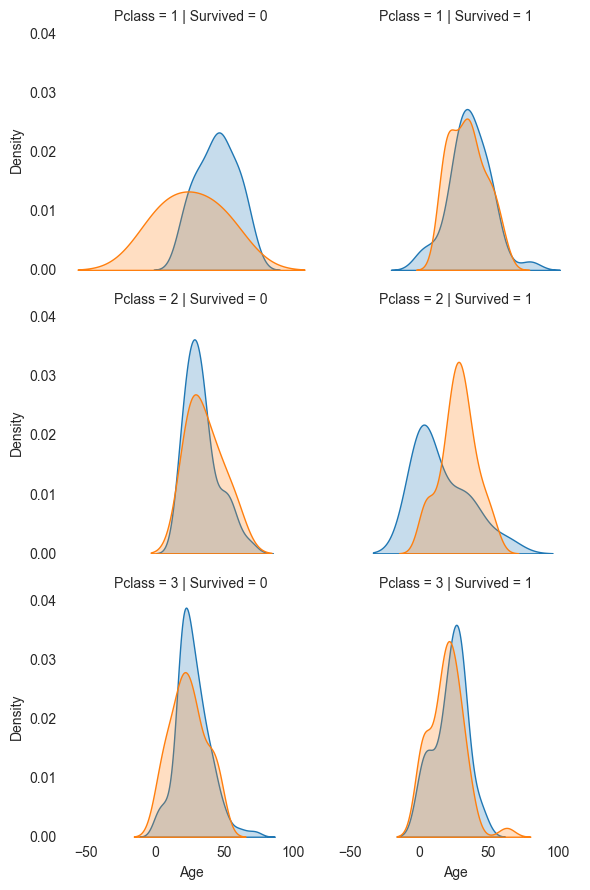

In [159]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', height=3)
g.map(sns.kdeplot, "Age", fill=True)
sns.despine(left=True, bottom=True)
plt.show()

###  Adding A Legend

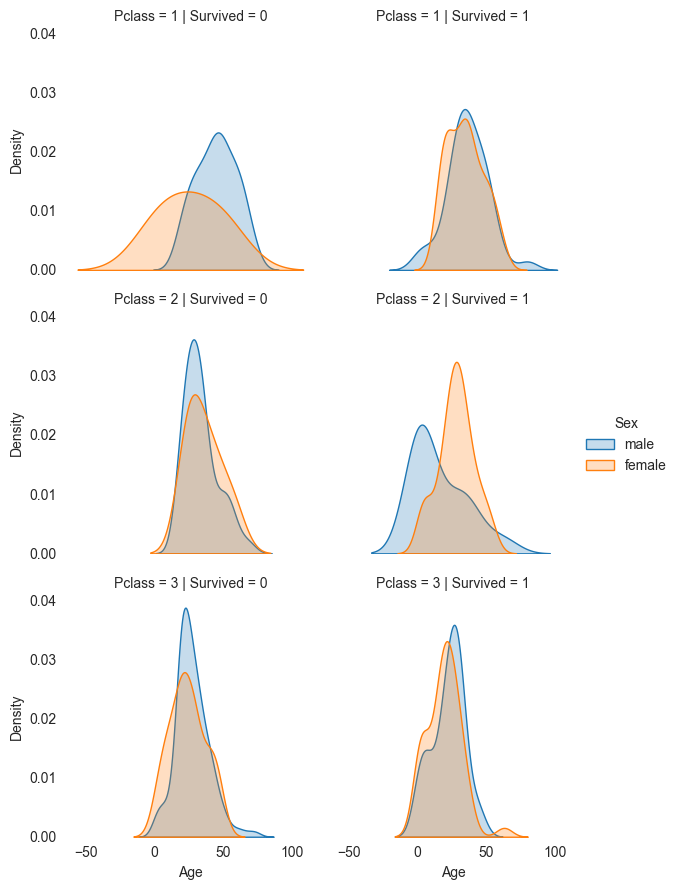

In [160]:
g = sns.FacetGrid(titanic, col="Survived", row="Pclass", hue='Sex', height=3)
g.map(sns.kdeplot, "Age", fill=True)
sns.despine(left=True, bottom=True)
g.add_legend()
plt.show()

# Dash 

In [161]:
#pip install dash

In [162]:
import dash
from dash import dcc
from dash import html
import pandas as pd

In [163]:
data = pd.read_csv("data/avocado.csv")
data = data.query("type == 'conventional' and region == 'Albany'")
data["Date"] = pd.to_datetime(data["Date"], format="%Y-%m-%d")
data.sort_values("Date", inplace=True)

In [164]:
app = dash.Dash(__name__)

In [165]:
app.layout = html.Div(
    children=[
        html.H1(
            children="Avocado Analytics",
        ),
        html.P(
            children="Analyze the behavior of avocado prices"
            " and the number of avocados sold in the US"
            " between 2015 and 2018",
        ),
        dcc.Graph(
            figure={
                "data": [
                    {
                        "x": data["Date"],
                        "y": data["AveragePrice"],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Average Price of Avocados"},
            },
        ),
        dcc.Graph(
            figure={
                "data": [
                    {
                        "x": data["Date"],
                        "y": data["Total Volume"],
                        "type": "lines",
                    },
                ],
                "layout": {"title": "Avocados Sold"},
            },
        ),
    ]
)


In [166]:
if __name__ == "__main__":
    app.run_server(debug=False)

Dash is running on http://127.0.0.1:8050/

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on http://127.0.0.1:8050
Press CTRL+C to quit
127.0.0.1 - - [05/Mar/2024 17:44:35] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [05/Mar/2024 17:44:35] "GET /_dash-dependencies HTTP/1.1" 200 -
127.0.0.1 - - [05/Mar/2024 17:44:35] "GET /_dash-layout HTTP/1.1" 200 -
127.0.0.1 - - [05/Mar/2024 17:44:35] "GET /_dash-component-suites/dash/dcc/async-graph.js HTTP/1.1" 304 -
127.0.0.1 - - [05/Mar/2024 17:44:35] "GET /_favicon.ico?v=2.8.1 HTTP/1.1" 200 -
127.0.0.1 - - [05/Mar/2024 17:44:35] "GET /_dash-component-suites/dash/dcc/async-plotlyjs.js HTTP/1.1" 304 -
